![Title](img/pycon.png)


## Geospatial Data Processing, Analysis and Visualization using Python

Prof. Martin Christen<br/>
mailto:martin.christen@fhnw.ch<br/>
Twitter: @MartinChristen<br/>
LinkedIn: https://www.linkedin.com/in/martinchristen/




### This notebook can be found at: https://github.com/martinchristen/PyConBy2019



In this notebook the following will be covered:

**Vector File Formats** (Shapefiles, GeoJSON, KML, GeoPackage, ...)<br/>
**Raster File Formats** (GeoTiff, JPG, ...)

* Shapely: Manipulation and analysis of geometric objects ( https://github.com/Toblerity/Shapely )
* Fiona - The pythonic way to handle vector data ( https://github.com/Toblerity/Fiona )
* rasterio - The pythonic way to handle raster data ( https://github.com/mapbox/rasterio )
* pyproj - transforming spatial reference systems ( https://github.com/jswhit/pyproj ) 
* Geospatial analysis using GeoPandas ( https://github.com/geopandas/geopandas ) 
* Creating maps using Folium ( https://github.com/python-visualization/folium ) and/or ipyleaflet ( https://github.com/jupyter-widgets/ipyleaflet )
  



### Data used in this notebook

* Natural Earth Dataset, https://www.naturalearthdata.com/ (public domain)
* Blue Marble: Next Generation was produced by Reto Stöckli, NASA Earth Observatory (NASA Goddard Space Flight Center
* geonames: http://www.geonames.org/ CC License
                                                                                     
To keep it simple, I put it on the git repository

![Title](img/overview_tools.png)

## 1. Installation

(This tutorial requires anaconda, if you don't have it yet, download it here: https://www.anaconda.com/download/ )

**This notebook requires Python 3.6 (or higher)** (jupyter Notebook or Jupyter Lab using Chrome)

### Installing Modules (conda)

Install the main modules using conda, dependencies will be resolved (gdal etc.)

    conda install shapely
    conda install fiona
    conda install rasterio
    conda install geopandas
    conda install folium -c conda-forge
    conda install ipyleaflet -c conda-forge 

## 2. Shapely

Shapely is a BSD-licensed Python package for **manipulation** and **analysis** of **planar geometric objects**. 

* Shapely is **not** concerned with data formats or coordinate systems.
* Shapely is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries.


### Simple Feature Access

**Simple Feature Access** is both an Open Geospatial Consortium (OGC) and International Organization for Standardization (ISO) standard **ISO 19125** that specifies a common storage and access model of mostly two-dimensional geometries (point, line, polygon, multi-point, multi-line, etc.) used by geographic information systems.





Shapely supports the following **Simple Feature Access** Features:

* Point
* LineString
* LinearRing        
* Polygon
* MultiLineString
* MultiPoint
* MultiPolygon

![Features](img/Features.png)

### Examples

In [1]:
from shapely.geometry import Polygon

polygon1 = Polygon([(30, 10), (40, 40), (20, 35), (10, 20), (30, 10)])

print(f"Polygon area: {polygon1.area}, polygon length: {polygon1.length}") 

Polygon area: 475.0, polygon length: 92.62674088208993


You can display shapely objects directly in the Jupyter Notebook (usually for "debug" purposes)

It is also possible to display this in matplotlib/descartes, we will see later how to bring this directly on a map)

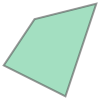

In [2]:
polygon1

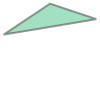

In [3]:
polygon2 = Polygon([(20,20),(80,30),(50,40),(20,20)])
polygon2

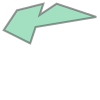

In [4]:
polygon2.union(polygon1)

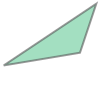

In [5]:
polygon2.intersection(polygon1)

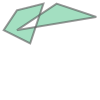

In [6]:
polygon2.symmetric_difference(polygon1)

In [7]:
result = polygon2.symmetric_difference(polygon1)

print(f"Polygon area: {result.area}, polygon length: {result.length}")

Polygon area: 803.9915966386554, polygon length: 221.13265554139582


### Well Known Text (WKT)

In [8]:
result.wkt

'MULTIPOLYGON (((20 20, 34.11764705882353 22.35294117647059, 30 10, 10 20, 20 35, 40 40, 37.14285714285715 31.42857142857143, 20 20)), ((37.14285714285715 31.42857142857143, 50 40, 80 30, 34.11764705882353 22.35294117647059, 37.14285714285715 31.42857142857143)))'

In [9]:
s = result.wkt
type(s)

str

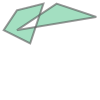

In [10]:
import shapely.wkt

mypolygon = shapely.wkt.loads(s)
mypolygon

### Binary operations on shapes:

- **contains** (Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.)
- **intersects** (Returns True if the boundary and interior of the object intersect in any way with those of the other.)
- **witin** (Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).
- **touches** (Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.)
- **crosses** (Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.)
- **equals** (Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.)

In [11]:
polygon1.intersects(polygon2)

True

In [12]:
polygon1.within(polygon2)

False

In [13]:
polygon1.equals(polygon1)

True

## 3. Fiona

Spatial information is not only geometry. Together with it we always have metadata (properties). Lets look at a first dataset.


### Reading Vector Data

In [14]:
import fiona

c = fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r')

airport = next(iter(c))
airport

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('scalerank', 9),
              ('featurecla', 'Airport'),
              ('type', 'small'),
              ('name', 'Sahnewal'),
              ('abbrev', 'LUH'),
              ('location', 'terminal'),
              ('gps_code', 'VILD'),
              ('iata_code', 'LUH'),
              ('wikipedia', 'http://en.wikipedia.org/wiki/Sahnewal_Airport'),
              ('natlscale', 8.0),
              ('comments', None),
              ('wikidataid', 'Q7399709'),
              ('name_ar', None),
              ('name_bn', None),
              ('name_de', None),
              ('name_en', 'Sahnewal Airport'),
              ('name_es', None),
              ('name_fr', None),
              ('name_el', None),
              ('name_hi',
               'à¤¸à¤¹à¥\x87à¤¨à¤µà¤¾à¤² à¤¹à¤µà¤¾à¤\x88 à¤\x85à¤¡à¥\x8dà¤¡à¤¾'),
              ('name_hu', None),
              ('name_id', None),
              ('name_it', None),
              ('name_ja', N

In [15]:
airport['properties']['name']

'Sahnewal'

In [16]:
airport['geometry']['type']

'Point'

In [17]:
airport['geometry']['coordinates']

(75.95707224036518, 30.850359856170176)

In [18]:
c.close()

### Two ways to read vector data

Lets read all data. There are basically two ways:

a) load everything to memory: (if dataset isn't too large...)

    alldata = list(c)
    
b) iterate through all data: (one by one):

    for element in c:
        ...
    

In [19]:
with fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r') as c:
    for airport in c:
        if airport['properties']['iata_code'] == "MSQ":
            print(airport['properties']['name'])
            print(airport['geometry']['coordinates'])
            print(airport['properties']['wikipedia'])        


Minsk Int'l
(28.034193334637767, 53.88937923980054)
http://en.wikipedia.org/wiki/Minsk_International_Airport


Coordinate System ? (Coordinate Reference System?)

In [20]:
with fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r') as c:
    print(c.crs)

{'init': 'epsg:4326'}


EPSG: 4326 look it up at: http://epsg.io/

( http://epsg.io/4326 )


For transformations to other spatial reference systems, use **pyproj**


### Lets look at another dataset:

In [21]:
import fiona

c = fiona.open('data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp', 'r', encoding="utf-8")

country = next(iter(c))
#country

In [22]:
print(country['properties']['NAME'])

Indonesia


In [23]:
print(country['properties']['NAME_ZH'])

印度尼西亚


In [24]:
print(country['properties']['NAME_RU'])

Индонезия


In [25]:
print(country['properties']['CONTINENT'])

Asia


In [26]:
print(country['properties']['POP_EST'])
print(country['properties']['POP_YEAR'])

260580739
2017


### Example: Find the "Belarus" Polygon and store it

In [27]:
with fiona.open('data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp', 'r') as c:
    for country in c:
        if country['properties']['NAME'] == "Belarus":
            print(country['properties']['POP_EST'])
            print(country['properties']['POP_YEAR'])   
            print(country['geometry']['type'])
            # print(country['geometry']['coordinates']) # you don't want to print all coordinates!
            geometry = country['geometry']


9549747
2017
Polygon


### Example: find Airports inside the Belarus polygon

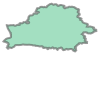

In [28]:
from shapely.geometry import shape
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon

by = Polygon(shape(geometry))
by

In [29]:
from shapely.geometry import Point

with fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r') as c:
    for airport in c:      
        position = Point(airport['geometry']['coordinates'])
        if position.within(by):
            print(airport['properties']['iata_code'], airport['properties']['name'], airport['geometry']['coordinates'])

MSQ Minsk Int'l (28.034193334637767, 53.88937923980054)


## 4. Rasterio

### Reading data

In [30]:
import rasterio

dataset = rasterio.open('data/BlueMarble.tif', 'r')

In [31]:
dataset.name

'data/BlueMarble.tif'

In [32]:
dataset.mode

'r'

In [33]:
dataset.count # number of raster bands, in our case 3 for r,g,b

3

In [34]:
dataset.indexes

(1, 2, 3)

In [35]:
dataset.width, dataset.height

(3600, 1800)

In [36]:
dataset.crs

CRS({'init': 'epsg:4326'})

In [37]:
dataset.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [38]:
dataset.transform  # affine transformation pixel to crs

Affine(0.1, 0.0, -180.0,
       0.0, -0.1, 90.0)

In [39]:
dataset.transform * (0, 0)

(-180.0, 90.0)

In [40]:
~dataset.transform # inverse affine transformation crs to pixel

Affine(10.0, 0.0, 1800.0,
       0.0, -10.0, 900.0)

In [41]:
~dataset.transform * (0,0)

(1800.0, 900.0)

In [42]:
px,py = ~dataset.transform * (27.487117, 53.869146) # Minsk coordinates to pixel coordinates! 
print(px,py)

2074.87117 361.30854


In [43]:
print(dataset.bounds.left)
print(dataset.bounds.bottom)
print(dataset.bounds.right)
print(dataset.bounds.top)

-180.0
-90.0
180.0
90.0


In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

In [46]:
rgb = np.dstack((r,g,b))  # stack r,g,b so we can display it...
rgb

array([[[ 15,  27,  51],
        [ 16,  28,  52],
        [ 16,  28,  54],
        ...,
        [127, 135, 146],
        [128, 136, 147],
        [128, 136, 147]],

       [[ 11,  25,  51],
        [ 10,  24,  50],
        [  8,  22,  48],
        ...,
        [128, 136, 149],
        [128, 136, 149],
        [127, 135, 148]],

       [[ 15,  29,  55],
        [ 11,  25,  51],
        [  6,  20,  46],
        ...,
        [125, 130, 149],
        [126, 131, 150],
        [125, 130, 149]],

       ...,

       [[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [241, 241, 241],
        [242, 242, 242],
        [242, 242, 242]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]]

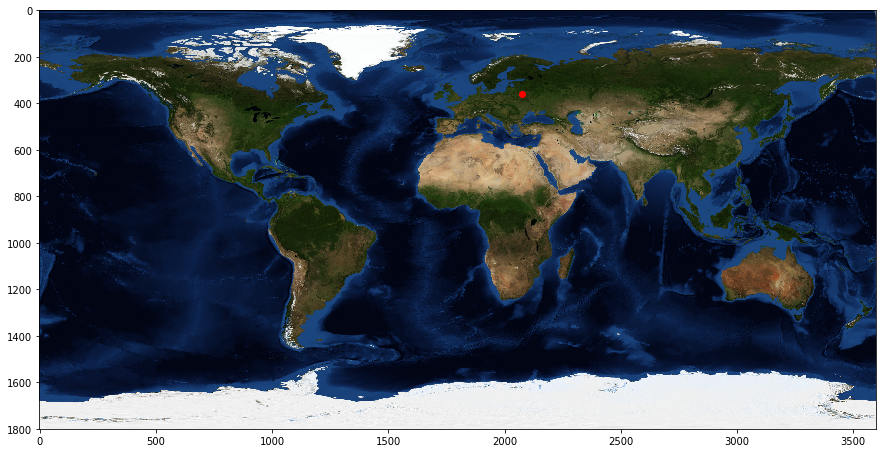

In [47]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest')
ax.plot(px,py, 'ro'); # IBB Minsk

## 5. Geopandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas **extends** the datatypes used by pandas to **allow spatial operations** on **geometric types**. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.
(geopandas.org)


In [48]:
import pandas as pd

df = pd.read_csv('data/cities5k.csv', encoding="utf-8", sep=",", header=None, low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,6,NaN,NaN,NaN,8022.0,NaN,921.0,Europe/Andorra,23/11/13
1,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,NaN,5,NaN,NaN,NaN,3066.0,NaN,1296.0,Europe/Andorra,11/12/09
2,3040051,les Escaldes,les Escaldes,"Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...",42.50729,1.53414,P,PPLA,AD,NaN,8,NaN,NaN,NaN,15853.0,NaN,1033.0,Europe/Andorra,15/10/08
3,3040132,la Massana,la Massana,"La Macana,La Massana,La Maçana,La-Massana,la M...",42.54499,1.51483,P,PPLA,AD,NaN,4,NaN,NaN,NaN,7211.0,NaN,1245.0,Europe/Andorra,15/10/08
4,3040686,Encamp,Encamp,"Ehnkam,Encamp,en kan pu,enkanpu jiao qu,Энкам,...",42.53474,1.58014,P,PPLA,AD,NaN,3,NaN,NaN,NaN,11223.0,NaN,1257.0,Europe/Andorra,13/04/12


In [49]:
df2 = df[[1,4,5,14]]
df2.columns = ["name", "lat", "lng", "population"]
df2.head()

,name,lat,lng,population
0,Sant Julià de Lòria,42.46372,1.49129,8022.0
1,Ordino,42.55623,1.53319,3066.0
2,les Escaldes,42.50729,1.53414,15853.0
3,la Massana,42.54499,1.51483,7211.0
4,Encamp,42.53474,1.58014,11223.0


In [50]:
df2.query("name == 'Minsk'")

,name,lat,lng,population
4817,Minsk,53.9,27.56667,1742124.0


### Geometry Column

Now lets create a geopandas dataframe. Basically just create a new column "geometry" - using Shapely to create Points

In [51]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(pos) for pos in zip(df2['lng'], df2['lat'])]
gdf = gpd.GeoDataFrame(df2, geometry=geometry)

In [52]:
gdf.head()

,name,lat,lng,population,geometry
0,Sant Julià de Lòria,42.46372,1.49129,8022.0,POINT (1.49129 42.46372)
1,Ordino,42.55623,1.53319,3066.0,POINT (1.53319 42.55623)
2,les Escaldes,42.50729,1.53414,15853.0,POINT (1.53414 42.50729)
3,la Massana,42.54499,1.51483,7211.0,POINT (1.51483 42.54499000000001)
4,Encamp,42.53474,1.58014,11223.0,POINT (1.58014 42.53474)


In [53]:
gdf = gdf.drop(['lat', 'lng'], axis=1) # remove redundant data, we only want "geometry"

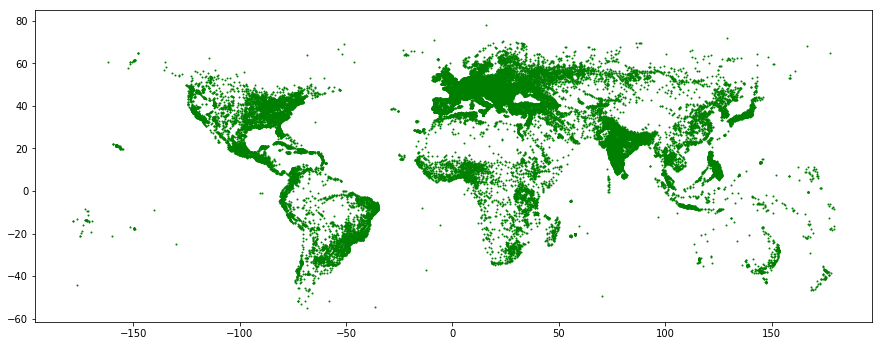

In [54]:
gdf.plot(color='green', markersize=1, figsize=(15,9))

In [55]:
# Export to Shapefile
# gdf.to_file("cities.shp", driver="Shapefile", encoding="utf-8")

In [56]:
cities = gdf
cities.head()  # store as "cities" for later

,name,population,geometry
0,Sant Julià de Lòria,8022.0,POINT (1.49129 42.46372)
1,Ordino,3066.0,POINT (1.53319 42.55623)
2,les Escaldes,15853.0,POINT (1.53414 42.50729)
3,la Massana,7211.0,POINT (1.51483 42.54499000000001)
4,Encamp,11223.0,POINT (1.58014 42.53474)


In [57]:
# another query:

bigcities = cities[cities.population > 10_000_000]

bigcities = bigcities.sort_values(['population'], ascending=False)
bigcities

,name,population,geometry
6357,Shanghai,22315474.0,POINT (121.45806 31.22222)
39062,Istanbul,14804116.0,POINT (28.94966 41.01384)
364,Buenos Aires,13076300.0,POINT (-58.37723 -34.61315)
21292,Mumbai,12691836.0,POINT (72.88261 19.07283)
27372,Mexico City,12294193.0,POINT (-99.12765999999999 19.42847)
6720,Beijing,11716620.0,POINT (116.39723 39.9075)
31686,Karachi,11624219.0,POINT (67.0104 24.8608)
6303,Tianjin,11090314.0,POINT (117.17667 39.14222)
6613,Guangzhou,11071424.0,POINT (113.25 23.11667)
21092,Delhi,10927986.0,POINT (77.23149000000001 28.65195)


### Dataset with Polygons

Now we load the admin 0 country files again:

In [58]:
countries = gpd.read_file("data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp", encoding="utf-8")
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((117.7036079039552 4.163414542001791...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,(POLYGON ((117.7036079039552 4.163414542001791...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,(POLYGON ((-69.51008875199994 -17.506588197999...


In [59]:
countries2 = countries[["NAME", "POP_EST", "geometry"]]
countries2.head()

,NAME,POP_EST,geometry
0,Indonesia,260580739,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,31381992,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,17789267,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,11138234,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Peru,31036656,(POLYGON ((-69.51008875199994 -17.506588197999...


In [60]:
by = countries2[countries2['NAME'] == "Belarus"]
by

,NAME,POP_EST,geometry
35,Belarus,9549747,"POLYGON ((23.60623824100014 51.51739919100002,..."


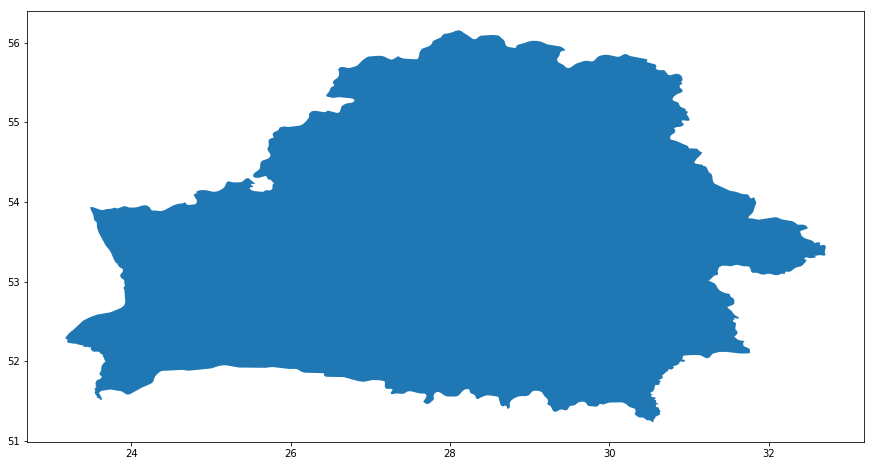

In [61]:
by.plot(figsize=(15,9))

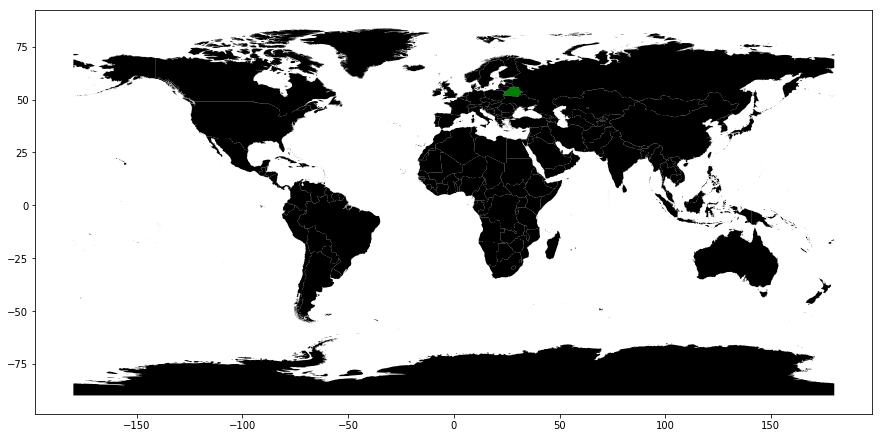

In [62]:
restoftheworld = countries2[countries2['NAME'] != "Belarus"]

ax = by.plot(figsize=(15,9), color="green")
restoftheworld.plot(ax=ax, color="black");

In [63]:
#type(de.geometry) # GeoSeries
type(by.iloc[0].geometry) # shapely.geometry.multipolygon.MultiPolygon or Polygon

shapely.geometry.polygon.Polygon

### Query positions within Polygons

In [64]:
# Get All Cities within Belarus Polygon

bycities = cities[cities.within(by.iloc[0].geometry)]
bycities.head(10)

,name,population,geometry
4759,Skidal’,10700.0,POINT (24.2478 53.5904)
4760,Horad Zhodzina,61007.0,POINT (28.3331 54.0985)
4761,Zhlobin,73089.0,POINT (30.024 52.8926)
4762,Zhytkavichy,13630.0,POINT (27.8561 52.2168)
4763,Zhabinka,10921.0,POINT (24.0115 52.1984)
4764,Zel’va,7000.0,POINT (24.8153 53.1504)
4765,Zaslawye,13500.0,POINT (27.2695 54.0114)
4766,Voranava,6500.0,POINT (25.3112 54.1492)
4767,Vitebsk,342700.0,POINT (30.2049 55.1904)
4768,Vishnyeva,7000.0,POINT (26.5228 54.7102)


## 6. Folium

In [65]:
import folium


m = folium.Map(location=[49.001575, 8.3832086], zoom_start=17)
m

### GeoPandas & Folium

our previous polygon "by" can be converted to GeoJson

In [66]:
import folium

center = [49.001575, 8.3832086] # ZKM in Karlsruhe!
map_zkm = folium.Map(center, zoom_start=5)   

folium.GeoJson(by).add_to(map_zkm)

map_zkm

In [67]:
import folium

center = [49.001575, 8.3832086] # ZKM in Karlsruhe!
map_zkm = folium.Map(center, zoom_start=5)   

folium.GeoJson(by,style_function=lambda feature: {
        'fillColor': 'green',   # you can also replace this with functions with feature as argument
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }).add_to(map_zkm)

map_zkm

In [68]:
# remember bigcities? Let's display them on a map using markers

bigcities.head()

,name,population,geometry
6357,Shanghai,22315474.0,POINT (121.45806 31.22222)
39062,Istanbul,14804116.0,POINT (28.94966 41.01384)
364,Buenos Aires,13076300.0,POINT (-58.37723 -34.61315)
21292,Mumbai,12691836.0,POINT (72.88261 19.07283)
27372,Mexico City,12294193.0,POINT (-99.12765999999999 19.42847)


In [69]:
world_map = folium.Map(location=[0,0], zoom_start=2)

def f(row):
    lng, lat = row[2].x, row[2].y
    name = row[0]
    population = row[1]
    folium.Marker([lat, lng], 
              popup=name + "<br/>" + str(int(population)),
              icon=folium.Icon(color="red", prefix="fa", icon="home")).add_to(world_map)

bigcities.apply(f, axis=1);
    
world_map



In [70]:
world_map.save("mymap.html")

# Another Example: Geodetic Line

In [71]:
center = [53.869146, 27.487117] 
zoom = 4

In [72]:
# Geodetic Line from Minsk to New York
import pyproj
g = pyproj.Geod(ellps='WGS84')

startlong = 27.487117
startlat = 53.869146
endlong = -74.001457
endlat = 40.7094328

lonlats = g.npts(startlong, startlat, endlong, endlat, 14)
lonlats = [(startlong, startlat)] + lonlats +  [(endlong, endlat)]    # Add Start and End

In [73]:
world_map = folium.Map(location=center, zoom_start=zoom)

for pos in lonlats:
    folium.Marker([pos[1], pos[0]], 
                  icon=folium.Icon(color="red", prefix="fa", icon="airport")).add_to(world_map)

    
world_map

## More Geo?

![gp2019](img/geopython.png)

## Don't miss EP2019!

![ep2019](img/ep2019.png)

### Questions


Download this Notebook here:  https://github.com/martinchristen/PyConBy2019


mailto:martin.christen@fhnw.ch<br/>
Twitter: @MartinChristen<br/>
LinkedIn: https://www.linkedin.com/in/martinchristen/